# Github Users Collaboration Network

<img src="images/graphs22.png" alt="" style="width: 400px;"/>


In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import networkx as nx
import nxviz as nv

path = 'data/dc23/'

In [3]:
G = nx.read_gpickle(path+'github_users.p')

## Characterizing the network (I)

To start out, let's do some basic characterization of the network, by looking at the number of nodes and number of edges in a network. It has been pre-loaded as G. Your job in this exercise is to identify how many nodes and edges are present in the network. You can use the functions `len(G.nodes())` and `len(G.edges())` to calculate the number of nodes and edges respectively.

In [4]:
# Number of nodes
len(G.nodes())

56519

In [5]:
# Number of edges
len(G.edges())

72900

In [18]:
list(G.nodes())[100]

'u101'

In [19]:
list(G.edges(data=True))[100]

('u3', 'u4328', {})

## Characterizing the network (II)

Let's continue recalling what you've learned before about node importances, by plotting the **degree distribution of a network**. This is the distribution of node degrees computed across all nodes in a network.

- Plot the **degree distribution** of the GitHub collaboration network G. Recall that there are four steps involved here:
    - Calculating the degree centrality of G.
    - Using the `.values()` method of G and converting it into a list.
    - Passing the list of degree distributions to `plt.hist()`.
    - Displaying the histogram with `plt.show()`.

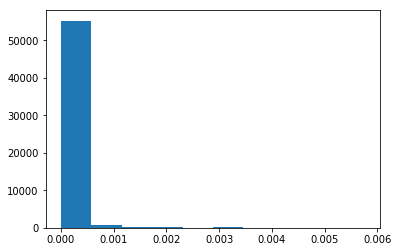

In [12]:
# Plot the degree distribution of the GitHub collaboration network
plt.hist(list(nx.degree_centrality(G).values()))
plt.show();

## Characterizing the network (III)

The last exercise was on degree centrality; this time round, let's recall **betweenness centrality**!

A small note: if executed correctly, this exercise may need about 5 seconds to execute.

- Plot the **betweenness centrality distribution** of the GitHub collaboration network. You have to follow exactly the same four steps as in the previous exercise, substituting `nx.betweenness_centrality()` in place of `nx.degree_centrality()`.

In [20]:
selected_nodes = [n for n, v in G.nodes(data=True) if n <= 'u101'] 
print(len(selected_nodes))
G100 = G.subgraph(selected_nodes).copy()

114


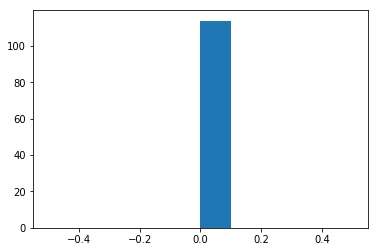

In [21]:
# Plot the degree distribution of the GitHub collaboration network
plt.hist(list(nx.betweenness_centrality(G100).values()))
plt.show();

## Connected Component Subgraphs

<img src="images/graphs23.png" alt="" style="width: 400px;"/>


## MatrixPlot

Let's now practice making some visualizations. The first one will be the **MatrixPlot**. In a **MatrixPlot**, the matrix is the representation of the edges.

- Make a **MatrixPlot** visualization of the largest **connected component subgraph**, with authors grouped by their user group number.
    - First, calculate the largest connected component subgraph by using the `nx.connected_component_subgraphs(G)` inside the provided `sorted()` function. Python's built-in `sorted()` function takes an iterable and returns a sorted list (in ascending order, by default). Therefore, to access the largest connected component subgraph, the statement is sliced with `[-1]`.
    - Create the **MatrixPlot** object h. You have to specify the parameters graph and node_grouping to be the largest connected component subgraph and 'grouping', respectively.
    - Draw the **MatrixPlot** object to the screen and display the plot.
    
Recall that in a **MatrixPlot**, nodes are the rows and columns of the matrix, and cells are filled in according to whether an edge exists between the pairs of nodes.

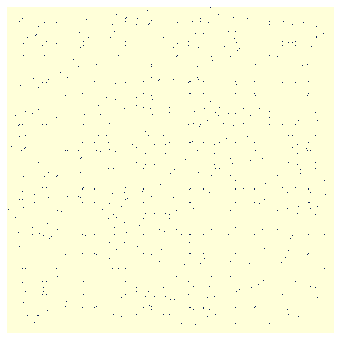

In [30]:
# Calculate the largest connected component subgraph: largest_ccs
largest_ccs = sorted(nx.connected_component_subgraphs(G), key=lambda x: len(x))[-1]

# Create the customized MatrixPlot object: h

# there is an issue with node_grouping: https://github.com/ericmjl/nxviz/issues/536
#h = nv.MatrixPlot(graph=largest_ccs, node_grouping='grouping')
h = nv.MatrixPlot(graph=largest_ccs)

# Draw the MatrixPlot to the screen
h.draw()
plt.show();